In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import pandas as pd
# from pprint import pprint
# from lxml import html
# from lxml.html import fromstring
# import urllib.request
from urllib.request import urlopen
# import random
import re
# import scrapy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_row", 50)
db=pd.read_csv("laliga_player_stats_english.csv")
db.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,82.00%,0,0.00%,1,0,0,0,0,0,32,0,0,228,27,0,0,0,3,3,18,1,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,18.00%,0,0.00%,2,0,0,0,0,0,13,0,1,54,3,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,29.00%,1,3.00%,4,0,0,0,0,0,15,12,28,50,57,11,4,0,19,19,43,26,0,2,16,0,0,1,7,9,3,0,2,0,0,0,0,0,0,0,0,0,1,0,15,107,38,69,536.0,457.0,78,1,0


### Reading the dataset

In [3]:
db.tail()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
551,Villarreal CF,Midfielder,37.0,Iván Martín,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
552,Villarreal CF,Midfielder,42.0,Andrei Ratiu,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,66.00%,19,50.00%,3,0,0,8,0,0,32,9,9,89,38,12,11,0,88,131,63,62,21,37,39,0,0,2,7,54,33,1,32,32,7,1,5,1,0,2,0,0,19,0,23,344,219,125,740.0,676.0,59,5,6
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,32.00%,31,82.00%,3,0,0,6,1,0,17,0,8,30,5,2,2,0,24,56,22,25,15,9,19,1,0,1,4,22,15,1,12,7,6,0,0,4,1,2,1,0,6,1,4,127,80,47,270.0,252.0,16,2,5
555,Villarreal CF,Forward,17.0,Toko Ekambi,2.148,34,89.00%,11,29.00%,24,63.00%,23,61.00%,5,0,0,10,0,0,28,0,11,63,9,8,3,0,91,96,33,48,20,29,27,2,0,5,10,49,32,1,52,38,9,1,1,9,0,0,0,0,31,0,11,268,187,81,501.0,477.0,23,1,5


In [4]:
db.shape

(556, 62)

In [5]:
#We observe the columns 
db.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

In [6]:
#Here we have the type of the columns
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   556 non-null    object 
 1   Position                               556 non-null    object 
 2   Shirt number                           526 non-null    float64
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    object 
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    object 
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    object 
 11  Games 

### Describing the dataset

In [7]:
db.describe()

,Shirt number,Minutes played,Games played,Full games played,Games started,Games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
count,526.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.00000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,15.688213,125.863646,18.602518,10.798561,14.825540,7.803957,3.284173,0.138489,0.084532,1.696043,0.187050,0.050360,19.001799,3.688849,14.643885,80.672662,27.901079,14.016187,8.546763,0.097122,51.334532,51.077338,24.764388,24.694245,3.01259,17.188849,18.154676,0.170863,0.232014,0.965827,6.133094,12.535971,5.643885,1.142086,12.510791,8.980216,1.467626,0.228417,0.539568,0.872302,0.187050,0.278777,0.057554,0.053957,19.789568,6.485612,22.598921,151.870504,102.411871,49.458633,298.276849,287.366338,86.906475,1.705036,1.059353
std,10.143810,239.665055,12.462351,10.560289,11.746272,7.635341,3.320995,0.398954,0.309102,3.503828,0.752829,0.218883,15.085522,5.709668,16.149052,73.931651,39.124600,14.380345,9.079209,0.341579,49.043826,50.781029,31.358437,29.528670,6.16893,18.436801,17.722622,0.492773,0.538717,1.592975,7.487906,17.337159,9.169425,1.913336,17.038215,13.046610,3.111275,0.715329,1.934108,2.048042,0.752829,0.734957,0.384750,0.226136,32.276798,19.998328,22.882684,137.610291,97.469928,58.638456,323.996696,303.818053,126.842323,4.109673,1.746575
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.250000,1.546250,6.000000,1.000000,3.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,18.000000,2.000000,1.000000,1.000000,0.000000,6.000000,5.750000,3.000000,2.000000,0.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,12.000000,6.750000,1.436000,1.701750,7.000000,0.000000,0.000000
50%,15.000000,2.413000,20.000000,8.000000,14.500000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,8.000000,67.000000,13.000000,9.500000,6.000000,0.000000,39.000000,37.500000,13.000000,17.000000,0.00000,12.000000,14.500000,0.000000,0.000000,0.000000,4.000000,6.000000,2.000000,0.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000,0.000000,16.000000,127.0

In [8]:
db.loc[0:25]

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,82.00%,0,0.00%,1,0,0,0,0,0,32,0,0,228,27,0,0,0,3,3,18,1,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,25,6,19,887.000,128.000,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,18.00%,0,0.00%,2,0,0,0,0,0,13,0,1,54,3,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,155.000,49.000,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,29.00%,1,3.00%,4,0,0,0,0,0,15,12,28,50,57,11,4,0,19,19,43,26,0,2,16,0,0,1,7,9,3,0,2,0,0,0,0,0,0,0,0,0,1,0,15,107,38,69,536.000,457.000,78,1,0
5,Athletic Club,Defender,4.0,I. Martínez,2.903,33,87.00%,32,84.00%,33,87.00%,1,3.00%,12,0,0,0,0,0,40,14,68,182,143,26,27,0,108,54,94,73,0,55,38,2,3,1,21,21,4,0,4,1,0,0,0,0,0,0,0,0,15,0,53,329,162,167,1.440,1.074,361,5,0
6,Athletic Club,Defender,5.0,Yeray,2.614,30,79.00%,28,74.00%,30,79.00%,2,5.00%,10,0,0,0,0,0,30,16,63,138,144,30,25,2,76,50,101,69,0,24,31,0,0,0,21,7,3,0,5,1,0,0,0,0,0,0,0,0,4,0,55,296,126,170,1.284,1.051,233,0,0
7,Athletic Club,Defender,6.0,San José,1.716,33,87.00%,15,39.00%,16,42.00%,18,47.00%,7,0,0,0,0,0,23,6,21,99,34,25,17,0,52,89,66,36,2,8,34,0,0,0,16,11,3,0,5,7,0,0,0,0,0,0,0,0,11,0,42,243,141,102,707.000,637.000,64,6,0
8,Athletic Club,Defender,12.0,Yuri B.,3.120,35,92.00%,33,87.00%,35,92.00%,2,5.00%,9,1,0,2,0,0,40,9,43,270,71,32,15,0,154,100,78,41,3,78,38,0,0,0,12,22,6,2,32,24,2,0,1,1,0,0,0,0,100,2,48,373,254,119,1.367,1.273,92,2,1
9,Athletic Club,Defender,15.0,I. Lekue,210.000,4,11.00%,2,5.00%,2,5.00%,2,5.00%,1,0,0,0,0,0,4,0,4,11,10,2,3,0,10,10,5,4,0,3,1,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0,0,0,10,2,5,29,20,9,85.000,75.000,10,0,0


### Modifying and droping columns

In [9]:
#We drop the columns that are not relevant in the dataset

In [10]:
db=db.drop(['Goals scored.1'],axis=1)
db=db.drop(['Goals from set piece'], axis=1)
db=db.drop(['Last man'], axis=1)
db=db.drop(['Penalties scored.1'], axis=1)
db=db.drop(['Tackles.1'], axis=1)



In [11]:
#We also rename the columns in order to give them an optimal name

In [12]:
db = db.rename(columns={'Shirt number': 'Shirt_number'})
db = db.rename(columns={'Penalties given away': 'Penalties_conceded'})
db

,Team,Position,Shirt_number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties_conceded,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Goals scored with header,Crosses,Corners,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,82.00%,0,0.00%,1,0,0,0,0,0,32,0,0,228,27,0,0,3,3,18,1,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,18.00%,0,0.00%,2,0,0,0,0,0,13,0,1,54,3,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,29.00%,1,3.00%,4,0,0,0,0,0,15,12,28,50,57,11,4,19,19,43,26,0,2,16,0,0,1,7,9,3,0,2,0,0,0,0,0,0,1,0,107,38,69,536.0,457.0,78,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Villarreal CF,Midfielder,37.0,Iván Martín,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
552,Villarreal CF,Midfielder,42.0,Andrei Ratiu,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,66.00%,19,50.00%,3,0,0,8,0,0,32,9,9,89,38,12,11,88,131,63,62,21,37,39,0,0,2,7,54,33,1,32,32,1,5,1,0,0,19,0,344,219,125,740.0,676.0,59,5,6
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,32.00%,31,82.00%,3,0,0,6,1,0,17,0,8,30,5,2,2,24,56,22,25,15,9,19,1,0,1,4,22,15,1,12,7,0,0,4,1,1,6,1,127,80,47,270.0,252.0,16,2,5


In [13]:
#Counting the number of players in each team

In [14]:
db.Team.value_counts()

Rayo Vallecano        33
Real Sociedad         33
Atlético de Madrid    32
Real Madrid           31
R. Valladolid CF      30
Real Betis            30
Athletic Club         29
CD Leganés            29
Girona FC             29
RCD Espanyol          28
Villarreal CF         27
Sevilla FC            26
FC Barcelona          26
Levante UD            26
D. Alavés             26
SD Huesca             25
RC Celta              25
Valencia CF           24
Getafe CF             24
SD Eibar              23
Name: Team, dtype: int64

### Looking for null values

In [15]:
#We observe the null values percentage in the Shirt number column
pd.set_option("display.max_row", 65)
Null_values_percentage = db.isnull().sum().apply(lambda x: x/db.shape[0]).sort_values(ascending=False)
Null_values_percentage
#It's a 5,4%

Shirt_number                             0.053957
Team                                     0.000000
From outside the area                    0.000000
Fouls suffered                           0.000000
Fouls committed                          0.000000
Penalties won                            0.000000
Penalties_conceded                       0.000000
Handballs committed                      0.000000
Fouls committed per card                 0.000000
Shots                                    0.000000
Shots on target                          0.000000
Assists                                  0.000000
Successful dribbles                      0.000000
Unsuccessful dribbles                    0.000000
From inside the area                     0.000000
Goals with left foot                     0.000000
Unsuccessful aerial challenges           0.000000
Goals with right foot                    0.000000
Goals scored with header                 0.000000
Crosses                                  0.000000


In [92]:
 #This tool show us the number of null values in each column

In [16]:
pd.set_option("display.max_row", 100)
db.isna().sum()

Team                                      0
Position                                  0
Shirt_number                             30
Name                                      0
Minutes played                            0
Games played                              0
Percentage of games played                0
Full games played                         0
Percentage of full games played           0
Games started                             0
Percentage of games started               0
Games where substituted                   0
Percentage of games where substituted     0
Yellow Cards                              0
Red Cards                                 0
Second Yellows                            0
Goals scored                              0
Penalties scored                          0
Own goals                                 0
Goals conceded while player on pitch      0
Tackles                                   0
Interceptions                             0
Recoveries                      

In [17]:
db['Shirt_number']

0       NaN
1       1.0
2      13.0
3      25.0
4       3.0
       ... 
551    37.0
552    42.0
553     7.0
554     9.0
555    17.0
Name: Shirt_number, Length: 556, dtype: float64

In [18]:
db['Shirt_number'].value_counts()

19.0    20
6.0     20
4.0     20
22.0    20
1.0     20
10.0    19
5.0     19
20.0    19
14.0    19
23.0    19
21.0    19
11.0    19
13.0    19
17.0    18
18.0    18
7.0     18
8.0     18
3.0     18
9.0     18
24.0    18
15.0    17
2.0     17
12.0    17
16.0    14
25.0     9
28.0     7
31.0     7
37.0     7
29.0     6
32.0     5
30.0     5
27.0     5
33.0     5
34.0     5
38.0     4
35.0     3
36.0     3
39.0     2
26.0     2
42.0     2
41.0     1
55.0     1
40.0     1
57.0     1
47.0     1
54.0     1
Name: Shirt_number, dtype: int64

### Changing the type 

In [19]:
#We change the type in order to apply regex later

In [20]:
db.Shirt_number=db.Shirt_number.astype(str) 
db.Shirt_number

0       nan
1       1.0
2      13.0
3      25.0
4       3.0
       ... 
551    37.0
552    42.0
553     7.0
554     9.0
555    17.0
Name: Shirt_number, Length: 556, dtype: object

### Applying regex

In [21]:
db.Shirt_number=db.Shirt_number.str.replace("nan", "Unknown")
db.Shirt_number

0      Unknown
1          1.0
2         13.0
3         25.0
4          3.0
        ...   
551       37.0
552       42.0
553        7.0
554        9.0
555       17.0
Name: Shirt_number, Length: 556, dtype: object

In [22]:
#Here we have all the rows that had a null value

In [23]:
db[db.Shirt_number.isin(['Unknown'])]

,Team,Position,Shirt_number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties_conceded,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Goals scored with header,Crosses,Corners,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,Unknown,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.0,0,0,0
11,Athletic Club,Midfielder,Unknown,Nolaskoain,465.000,8,21.00%,3,8.00%,4,11.00%,5,13.00%,2,1,0,2,0,0,11,6,10,26,18,8,3,13,11,15,12,0,1,5,0,0,0,3,4,3,0,2,1,0,0,0,0,0,0,0,51,24,27,276.000,253.0,23,0,2
24,Athletic Club,Forward,Unknown,Gorka Guruzeta,45.000,6,16.00%,0,0.00%,0,0.00%,6,16.00%,0,0,0,0,0,0,3,0,2,2,0,1,0,1,6,3,10,0,0,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,20,7,13,9.000,9.0,0,0,0
29,Atlético de Madrid,Goalkeeper,Unknown,Alex Dos Santos,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.0,0,0,0
75,CD Leganés,Midfielder,Unknown,Óscar,2.515,31,82.00%,16,42.00%,29,76.00%,15,39.00%,5,0,0,4,0,0,25,2,17,138,13,25,21,108,147,22,47,4,27,31,1,0,2,9,46,22,3,35,43,0,2,1,0,0,73,73,324,255,69,950.000,842.0,106,2,2
84,CD Leganés,Forward,Unknown,Youssef En-Nesyri,2.104,31,82.00%,13,34.00%,22,58.00%,18,47.00%,7,0,0,9,0,1,28,3,8,71,23,8,8,77,136,147,112,17,40,36,0,0,3,14,64,24,2,27,36,1,5,2,0,0,34,1,472,213,259,465.000,439.0,26,0,2
101,D. Alavés,Midfielder,Unknown,Álex Blanco,14.000,2,5.00%,0,0.00%,0,0.00%,2,5.00%,0,0,0,0,0,0,2,0,0,2,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,4,0,6.000,6.0,0,0,0
119,FC Barcelona,Defender,Unknown,Jeison Murillo,202.000,3,8.00%,2,5.00%,2,5.00%,1,3.00%,0,0,0,0,0,0,2,0,2,6,11,3,1,7,6,7,7,0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,27,13,14,142.000,121.0,21,0,0
166,Girona FC,Goalkeeper,Unknown,J. Suárez,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.0,0,0,0
179,Girona FC,Midfielder,Unknown,Kevin Soni,78.000,5,13.00%,0,0.00%,1,3.00%,5,13.00%,1,0,0,0,0,0,2,0,1,7,0,2,1,11,17,2,3,0,2,6,0,0,0,4,3,1,0,6,4,0,0,0,0,0,2,0,33,28,5,22.000,21.0,1,0,0


### Scraping

In [103]:
# We use webscraping and obtain every Shirt number of each player

In [24]:
#Alex Blanco
url = "https://www.transfermarkt.es/alex-blanco/rueckennummern/spieler/328914"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Valencia CF,16,NaN
1,20/21,NaN,Valencia CF,31,NaN
2,20/21,NaN,Valencia CF,37,NaN
3,19/20,NaN,Real Zaragoza,15,NaN
4,18/19,NaN,Deportivo Alavés,7,NaN
5,18/19,NaN,Valencia CF,30,NaN
6,18/19,NaN,Valencia Mestalla,7,NaN
7,18/19,NaN,Valencia Mestalla,11,NaN
8,18/19,NaN,Valencia Mestalla,18,NaN
9,17/18,NaN,Valencia Mestalla,7,NaN


In [25]:
#En-Nesyri
url = "https://www.transfermarkt.es/youssef-en-nesyri/rueckennummern/spieler/433049"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales


,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Sevilla FC,15,NaN
1,19/20,NaN,Sevilla FC,15,NaN
2,19/20,NaN,Sevilla FC,51,NaN
3,19/20,NaN,CD Leganés,26,NaN
4,18/19,NaN,CD Leganés,26,NaN
5,17/18,NaN,Málaga CF,26,NaN
6,16/17,NaN,Málaga CF,26,NaN


In [26]:
#Jeison Murillo
url = "https://www.transfermarkt.es/jeison-murillo/rueckennummern/spieler/131102"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,RC Celta de Vigo,24,NaN
1,19/20,NaN,RC Celta de Vigo,21,NaN
2,19/20,NaN,UC Sampdoria,21,NaN
3,18/19,NaN,FC Barcelona,17,NaN
4,18/19,NaN,Valencia CF,4,NaN
5,17/18,NaN,Valencia CF,4,NaN
6,16/17,NaN,Inter de Milán,24,NaN
7,15/16,NaN,Inter de Milán,24,NaN
8,14/15,NaN,Granada CF,24,NaN
9,13/14,NaN,Granada CF,24,NaN


In [27]:
#Pablo Hervías
url = "https://www.transfermarkt.es/pablo-hervias/rueckennummern/spieler/142027"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Real Valladolid CF,11,NaN
1,19/20,NaN,Real Valladolid CF,11,NaN
2,18/19,NaN,Real Valladolid CF,15,NaN
3,18/19,NaN,SD Eibar,18,NaN
4,17/18,NaN,Real Valladolid CF,11,NaN
5,16/17,NaN,Elche CF,11,NaN
6,16/17,NaN,Elche CF,17,NaN
7,15/16,NaN,Real Oviedo,21,NaN
8,14/15,NaN,CA Osasuna,20,NaN
9,14/15,NaN,Real Sociedad,29,NaN


In [28]:
#Sergio Akieme
url = "https://www.transfermarkt.es/sergio-akieme/rueckennummern/spieler/355627"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,UD Almería,12,NaN
1,20/21,NaN,UD Almería,15,NaN
2,19/20,NaN,FC Barcelona,39,NaN
3,19/20,NaN,FC Barcelona B,18,NaN
4,19/20,NaN,Rayo Vallecano,3,NaN
5,18/19,NaN,Rayo Vallecano,28,NaN
6,17/18,NaN,Rayo Vallecano,12,NaN
7,17/18,NaN,Rayo Vallecano,28,NaN
8,16/17,NaN,Rayo Vallecano,31,NaN
9,15/16,NaN,Rayo Vallecano,37,NaN


In [29]:
#Santi Comesaña
url = "https://www.transfermarkt.es/santi-comesana/rueckennummern/spieler/380598"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Rayo Vallecano,6,NaN
1,19/20,NaN,Rayo Vallecano,6,NaN
2,18/19,NaN,Rayo Vallecano,27,NaN
3,17/18,NaN,Rayo Vallecano,21,NaN
4,17/18,NaN,Rayo Vallecano,27,NaN
5,16/17,NaN,Rayo Vallecano,27,NaN
6,15/16,NaN,Coruxo FC,11,NaN


In [32]:
#Alfa Semedo
url = "https://www.transfermarkt.es/alfa-semedo/rueckennummern/spieler/359210"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,FC Reading,30,NaN
1,19/20,NaN,Nottingham Forest,17,NaN
2,18/19,NaN,RCD Espanyol,2,NaN
3,18/19,NaN,SL Benfica,16,NaN
4,17/18,NaN,Moreirense FC,90,NaN
5,15/16,NaN,SL Benfica UEFA U19,14,NaN
6,15/16,NaN,SL Benfica UEFA U19,15,NaN
7,15/16,NaN,SL Benfica UEFA U19,16,NaN
8,15/16,NaN,SL Benfica UEFA U19,18,NaN
9,14/15,NaN,SL Benfica UEFA U19,15,NaN


In [33]:
#Facundo Ferreyra
url = "https://www.transfermarkt.es/facundo-ferreyra/rueckennummern/spieler/93795"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,RC Celta de Vigo,12,NaN
1,20/21,NaN,SL Benfica,37,NaN
2,19/20,NaN,RCD Espanyol,9,NaN
3,18/19,NaN,RCD Espanyol,11,NaN
4,18/19,NaN,SL Benfica,19,NaN
5,17/18,NaN,Shakhtar Donetsk,19,NaN
6,16/17,NaN,Shakhtar Donetsk,19,NaN
7,15/16,NaN,Shakhtar Donetsk,19,NaN
8,14/15,NaN,Newcastle United,15,NaN
9,14/15,NaN,Newcastle United U23,8,NaN


In [34]:
#Emerson Royal
url = "https://www.transfermarkt.es/emerson-royal/rueckennummern/spieler/476344"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Real Betis Balompié,22,NaN
1,19/20,NaN,Real Betis Balompié,22,NaN
2,18/19,NaN,Real Betis Balompié,24,NaN
3,17/18,NaN,Clube Atlético Mineiro,14,NaN
4,16/17,NaN,Associação Atlética Ponte Preta SP,2,NaN
5,16/17,NaN,Associação Atlética Ponte Preta SP,14,NaN
6,16/17,NaN,Associação Atlética Ponte Preta SP,15,NaN
7,16/17,NaN,Associação Atlética Ponte Preta SP,21,NaN
8,16/17,NaN,Associação Atlética Ponte Preta SP,22,NaN
9,16/17,NaN,Associação Atlética Ponte Preta SP,24,NaN


In [35]:
#Wilfrid Kaptoum
url = "https://www.transfermarkt.es/wilfrid-kaptoum/rueckennummern/spieler/256120"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,New England Revolution,5,NaN
1,19/20,NaN,UD Almería,14,NaN
2,19/20,NaN,Real Betis Balompié,21,NaN
3,18/19,NaN,Real Betis Balompié,34,NaN
4,16/17,NaN,FC Barcelona B,16,NaN
5,16/17,NaN,FC Barcelona,27,NaN
6,15/16,NaN,FC Barcelona,34,NaN
7,14/15,NaN,FC Barcelona UEFA U19,17,NaN
8,14/15,NaN,FC Barcelona B,30,NaN
9,13/14,NaN,FC Barcelona B,32,NaN


In [36]:
#Luca Zidane
url = "https://www.transfermarkt.es/luca-zidane/rueckennummern/spieler/283489"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Rayo Vallecano,1,NaN
1,20/21,NaN,Rayo Vallecano,25,NaN
2,19/20,NaN,Racing de Santander,13,NaN
3,18/19,NaN,Real Madrid CF,30,NaN
4,18/19,NaN,Real Madrid Castilla,1,NaN
5,17/18,NaN,Real Madrid CF,30,NaN
6,17/18,NaN,Real Madrid Castilla,1,NaN
7,16/17,NaN,Real Madrid UEFA U19,1,NaN
8,16/17,NaN,Real Madrid Castilla,1,NaN
9,16/17,NaN,Real Madrid Castilla,13,NaN


In [37]:
#Javi Sanchez
url = "https://www.transfermarkt.es/javi-sanchez/rueckennummern/spieler/340853"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Real Valladolid CF,5,NaN
1,19/20,NaN,Real Valladolid CF,5,NaN
2,18/19,NaN,Real Madrid Castilla,5,NaN
3,18/19,NaN,Real Madrid CF,31,NaN
4,17/18,NaN,Real Madrid Castilla,4,NaN
5,15/16,NaN,Real Madrid UEFA U19,5,NaN
6,14/15,NaN,Real Madrid UEFA U19,21,NaN
7,14/15,NaN,Real Madrid UEFA U19,37,NaN


In [46]:
#Cristo
url = "https://www.transfermarkt.es/cristo/rueckennummern/spieler/339707"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,CD Mirandés,9,NaN
1,20/21,NaN,Udinese Calcio,33,NaN
2,20/21,NaN,Udinese Primavera,9,NaN
3,19/20,NaN,SD Huesca,10,NaN
4,19/20,NaN,SD Huesca,15,NaN
5,18/19,NaN,Real Madrid CF,27,NaN
6,18/19,NaN,Real Madrid Castilla,9,NaN
7,18/19,NaN,Real Madrid Castilla,10,NaN
8,17/18,NaN,Real Madrid CF,37,NaN
9,17/18,NaN,Real Madrid Castilla,10,NaN


In [38]:
#Andoni Zubiaurre
url = "https://www.transfermarkt.es/andoni-zubiaurre/rueckennummern/spieler/428948"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Cultural Leonesa,1,NaN
1,20/21,NaN,Real Sociedad,30,NaN
2,19/20,NaN,Real Sociedad,30,NaN
3,19/20,NaN,Real Sociedad B,25,NaN
4,18/19,NaN,Real Sociedad B,1,NaN
5,18/19,NaN,Real Sociedad,30,NaN
6,17/18,NaN,Real Sociedad,38,NaN
7,17/18,NaN,Real Sociedad B,1,NaN
8,16/17,NaN,Real Sociedad B,13,NaN


In [39]:
#Ander Guevara
url = "https://www.transfermarkt.es/ander-guevara/rueckennummern/spieler/465967"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Real Sociedad,16,NaN
1,19/20,NaN,Real Sociedad,16,NaN
2,18/19,NaN,Real Sociedad,26,NaN
3,18/19,NaN,Real Sociedad B,6,NaN
4,17/18,NaN,Real Sociedad B,6,NaN
5,17/18,NaN,Real Sociedad,29,NaN
6,16/17,NaN,Real Sociedad B,17,NaN


In [40]:
#Quintilla
url = "https://www.transfermarkt.es/xavi-quintilla/rueckennummern/spieler/204102"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,Norwich City,16,NaN
1,19/20,NaN,Villarreal CF,16,NaN
2,18/19,NaN,Villarreal CF,39,NaN
3,18/19,NaN,Villarreal CF B,3,NaN
4,17/18,NaN,Villarreal CF B,3,NaN
5,17/18,NaN,Villarreal CF B,12,NaN
6,14/15,NaN,FC Barcelona UEFA U19,4,NaN
7,14/15,NaN,FC Barcelona B,26,NaN
8,13/14,NaN,FC Barcelona UEFA U19,4,NaN
9,13/14,NaN,FC Barcelona B,26,NaN


In [41]:
#Morlanes
url = "https://www.transfermarkt.es/manu-morlanes/rueckennummern/spieler/335225"
response = requests.get(url,headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'html.parser')
soup.find("span", {"class": "dataRN"}).text

Dorsales = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text,
                              attrs={"class":"items"})[0]
Dorsales

,Temporada,Club,Club.1,Unnamed: 3,Dorsal
0,20/21,NaN,UD Almería,5,NaN
1,20/21,NaN,UD Almería,14,NaN
2,19/20,NaN,Villarreal CF,15,NaN
3,18/19,NaN,Villarreal CF B,8,NaN
4,18/19,NaN,Villarreal CF,28,NaN
5,17/18,NaN,Villarreal CF,40,NaN
6,17/18,NaN,Villarreal CF B,8,NaN
7,17/18,NaN,Villarreal CF B,16,NaN


### Filling the null values

In [43]:
db.Shirt_number[0]=31
db.Shirt_number[11]=26
db.Shirt_number[24]=30
db.Shirt_number[29]=37
db.Shirt_number[75]=27
db.Shirt_number[84]=26
db.Shirt_number[101]=7
db.Shirt_number[119]=17
db.Shirt_number[166]=30
db.Shirt_number[179]=27
db.Shirt_number[180]=31
db.Shirt_number[181]=29
db.Shirt_number[198]=28
db.Shirt_number[233]=15
db.Shirt_number[254]=5
db.Shirt_number[255]=28
db.Shirt_number[265]=27
db.Shirt_number[287]=25
db.Shirt_number[311]=27
db.Shirt_number[320]=2
db.Shirt_number[321]=11
db.Shirt_number[339]=24
db.Shirt_number[349]=34
db.Shirt_number[367]=30
db.Shirt_number[370]=31
db.Shirt_number[392]=27
db.Shirt_number[398]=30
db.Shirt_number[412]=26
db.Shirt_number[532]=39
db.Shirt_number[540]=28


<ipython-input-43-858b50acb3a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.Shirt_number[0]=31
<ipython-input-43-858b50acb3a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.Shirt_number[11]=26
<ipython-input-43-858b50acb3a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.Shirt_number[24]=30
<ipython-input-43-858b50acb3a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [ ]:
#Here is the result: we don't have null values!!

In [44]:
pd.set_option("display.max_row", 100)
db.isna().sum()

Team                                     0
Position                                 0
Shirt_number                             0
Name                                     0
Minutes played                           0
Games played                             0
Percentage of games played               0
Full games played                        0
Percentage of full games played          0
Games started                            0
Percentage of games started              0
Games where substituted                  0
Percentage of games where substituted    0
Yellow Cards                             0
Red Cards                                0
Second Yellows                           0
Goals scored                             0
Penalties scored                         0
Own goals                                0
Goals conceded while player on pitch     0
Tackles                                  0
Interceptions                            0
Recoveries                               0
Clearances 

In [45]:
db


,Team,Position,Shirt_number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties_conceded,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Goals scored with header,Crosses,Corners,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,31,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,82.00%,0,0.00%,1,0,0,0,0,0,32,0,0,228,27,0,0,3,3,18,1,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,18.00%,0,0.00%,2,0,0,0,0,0,13,0,1,54,3,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,29.00%,1,3.00%,4,0,0,0,0,0,15,12,28,50,57,11,4,19,19,43,26,0,2,16,0,0,1,7,9,3,0,2,0,0,0,0,0,0,1,0,107,38,69,536.0,457.0,78,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Villarreal CF,Midfielder,37.0,Iván Martín,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
552,Villarreal CF,Midfielder,42.0,Andrei Ratiu,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,66.00%,19,50.00%,3,0,0,8,0,0,32,9,9,89,38,12,11,88,131,63,62,21,37,39,0,0,2,7,54,33,1,32,32,1,5,1,0,0,19,0,344,219,125,740.0,676.0,59,5,6
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,32.00%,31,82.00%,3,0,0,6,1,0,17,0,8,30,5,2,2,24,56,22,25,15,9,19,1,0,1,4,22,15,1,12,7,0,0,4,1,1,6,1,127,80,47,270.0,252.0,16,2,5


In [13]:
db[db.Team.isin(['Athletic Club'])]

,Team,Position,Shirt_number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,31,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,82.00%,0,0.00%,1,0,0,0,0,0,32,0,0,228,27,0,0,0,3,3,18,1,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,25,6,19,887.000,128.000,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,18.00%,0,0.00%,2,0,0,0,0,0,13,0,1,54,3,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,155.000,49.000,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,29.00%,1,3.00%,4,0,0,0,0,0,15,12,28,50,57,11,4,0,19,19,43,26,0,2,16,0,0,1,7,9,3,0,2,0,0,0,0,0,0,0,0,0,1,0,15,107,38,69,536.000,457.000,78,1,0
5,Athletic Club,Defender,4.0,I. Martínez,2.903,33,87.00%,32,84.00%,33,87.00%,1,3.00%,12,0,0,0,0,0,40,14,68,182,143,26,27,0,108,54,94,73,0,55,38,2,3,1,21,21,4,0,4,1,0,0,0,0,0,0,0,0,15,0,53,329,162,167,1.440,1.074,361,5,0
6,Athletic Club,Defender,5.0,Yeray,2.614,30,79.00%,28,74.00%,30,79.00%,2,5.00%,10,0,0,0,0,0,30,16,63,138,144,30,25,2,76,50,101,69,0,24,31,0,0,0,21,7,3,0,5,1,0,0,0,0,0,0,0,0,4,0,55,296,126,170,1.284,1.051,233,0,0
7,Athletic Club,Defender,6.0,San José,1.716,33,87.00%,15,39.00%,16,42.00%,18,47.00%,7,0,0,0,0,0,23,6,21,99,34,25,17,0,52,89,66,36,2,8,34,0,0,0,16,11,3,0,5,7,0,0,0,0,0,0,0,0,11,0,42,243,141,102,707.000,637.000,64,6,0
8,Athletic Club,Defender,12.0,Yuri B.,3.120,35,92.00%,33,87.00%,35,92.00%,2,5.00%,9,1,0,2,0,0,40,9,43,270,71,32,15,0,154,100,78,41,3,78,38,0,0,0,12,22,6,2,32,24,2,0,1,1,0,0,0,0,100,2,48,373,254,119,1.367,1.273,92,2,1
9,Athletic Club,Defender,15.0,I. Lekue,210.000,4,11.00%,2,5.00%,2,5.00%,2,5.00%,1,0,0,0,0,0,4,0,4,11,10,2,3,0,10,10,5,4,0,3,1,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0,0,0,10,2,5,29,20,9,85.000,75.000,10,0,0


### Correlation

In [ ]:
#We study the correlation between variables 

#We will use it later in our model

In [110]:
db.corr()

,Minutes played,Games played,Full games played,Games started,Games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties_conceded,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Goals scored with header,Crosses,Corners,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
Minutes played,1.000000,-0.282421,-0.369789,-0.376947,0.050482,-0.287554,-0.102330,-0.094863,-0.172889,-0.079644,-0.029685,-0.325553,-0.190257,-0.292703,-0.338221,-0.230616,-0.287406,-0.277509,-0.292527,-0.263877,-0.235233,-0.229319,-0.123754,-0.269754,-0.264496,-0.075735,-0.085762,-0.140169,-0.249236,-0.215863,-0.175380,-0.206332,-0.175118,-0.150777,-0.129610,-0.109252,-0.146140,-0.079644,-0.064702,-0.160552,-0.119874,-0.304444,-0.284668,-0.241275,-0.125847,-0.163448,-0.241243,-0.139585,-0.191986
Games played,-0.282421,1.000000,0.792256,0.933683,0.536439,0.661288,0.210047,0.172447,0.459130,0.270085,0.124266,0.882537,0.416374,0.625868,0.803917,0.467996,0.672315,0.660806,0.771574,0.760517,0.572399,0.626599,0.425255,0.706365,0.726121,0.273085,0.223364,0.475899,0.546282,0.614101,0.545358,0.526334,0.575756,0.535667,0.319441,0.262176,0.423619,0.270085,0.160350,0.470080,0.313202,0.820527,0.784455,0.621643,0.425143,0.484956,0.507765,0.374453,0.542212
Full games played,-0.369789,0.792256,1.000000,0.927010,-0.089965,0.630635,0.192242,0.159783,0.272985,0.186059,0.193037,0.867473,0.572827,0.692117,0.879624,0.668490,0.643392,0.605102,0.586739,0.483741,0.555054,0.465231,0.183439,0.501874,0.549172,0.139931,0.327163,0.285997,0.497078,0.353284,0.299677,0.351785,0.313290,0.259761,0.197395,0.174883,0.210497,0.186059,0.125696,0.345517,0.194911,0.613937,0.547254,0.531106,0.250479,0.287420,0.736982,0.218003,0.302996
Games started,-0.376947,0.933683,0.927010,1.000000,0.241822,0.688889,0.229322,0.189669,0.411500,0.258392,0.159702,0.921999,0.506116,0.689869,0.883910,0.579445,0.703626,0.684097,0.749385,0.696022,0.600153,0.597578,0.338400,0.674943,0.699092,0.224927,0.290292,0.415573,0.567733,0.539796,0.472345,0.495999,0.506599,0.455034,0.280304,0.243983,0.360978,0.258392,0.144157,0.446119,0.295546,0.788916,0.739689,0.621871,0.365791,0.419378,0.631917,0.332505,0.468351
Games where substituted,0.050482,0.536439,-0.089965,0.241822,1.000000,0.207131,0.076951,0.060475,0.371829,0.183496,-0.064160,0.240685,-0.112663,0.064284,0.095557,-0.160715,0.207484,0.241658,0.447852,0.572258,0.166583,0.379280,0.440386,0.458793,0.425621,0.252193,-0.087920,0.381203,0.204139,0.513711,0.475652,0.372533,0.506440,0.515042,0.248375,0.186043,0.400295,0.183496,0.087875,0.289385,0.241629,0.490135,0.523487,0.280079,0.347483,0.394017,-0.190535,0.309663,0.465927
Yellow Cards,-0.287554,0.661288,0.630635,0.688889,0.207131,1.000000,0.223189,0.180165,0.225767,0.145178,0.161223,0.650378,0.521691,0.715375,0.596179,0.552367,0.736326,0.712642,0.677736,0.609610,0.579640,0.519134,0.166400,0.588143,0.774902,0.137630,0.350819,0.334934,0.903098,0.359734,0.272017,0.346385,0.349073,0.264073,0.202441,0.102318,0.212240,0.145178,0.090117,0.346140,0.219948,0.709986,0.658618,0.571399,0.237499,0.386207,0.319517,0.186752,0.285046
Red Cards,-0.102330,0.210047,0.192242,0.229322,0.076951,0.223189,1.000000,0.796172,0.040480,0.069573,0.043790,0.217309,0.235683,0.271672,0.187002,0.289464,0.257453,0.214842,0.217624,0.180635,0.221959,0.150277,0.018325,0.203186,0.250014,0.016896,0.177183,0.086844,0.303233,0.081726,0.051431,0.115802,0.083939,0.047606,0.065737,-0.003612,0.050350,0.069573,-0.040282,0.070830,0.078276,0.227045,0.203611,0.

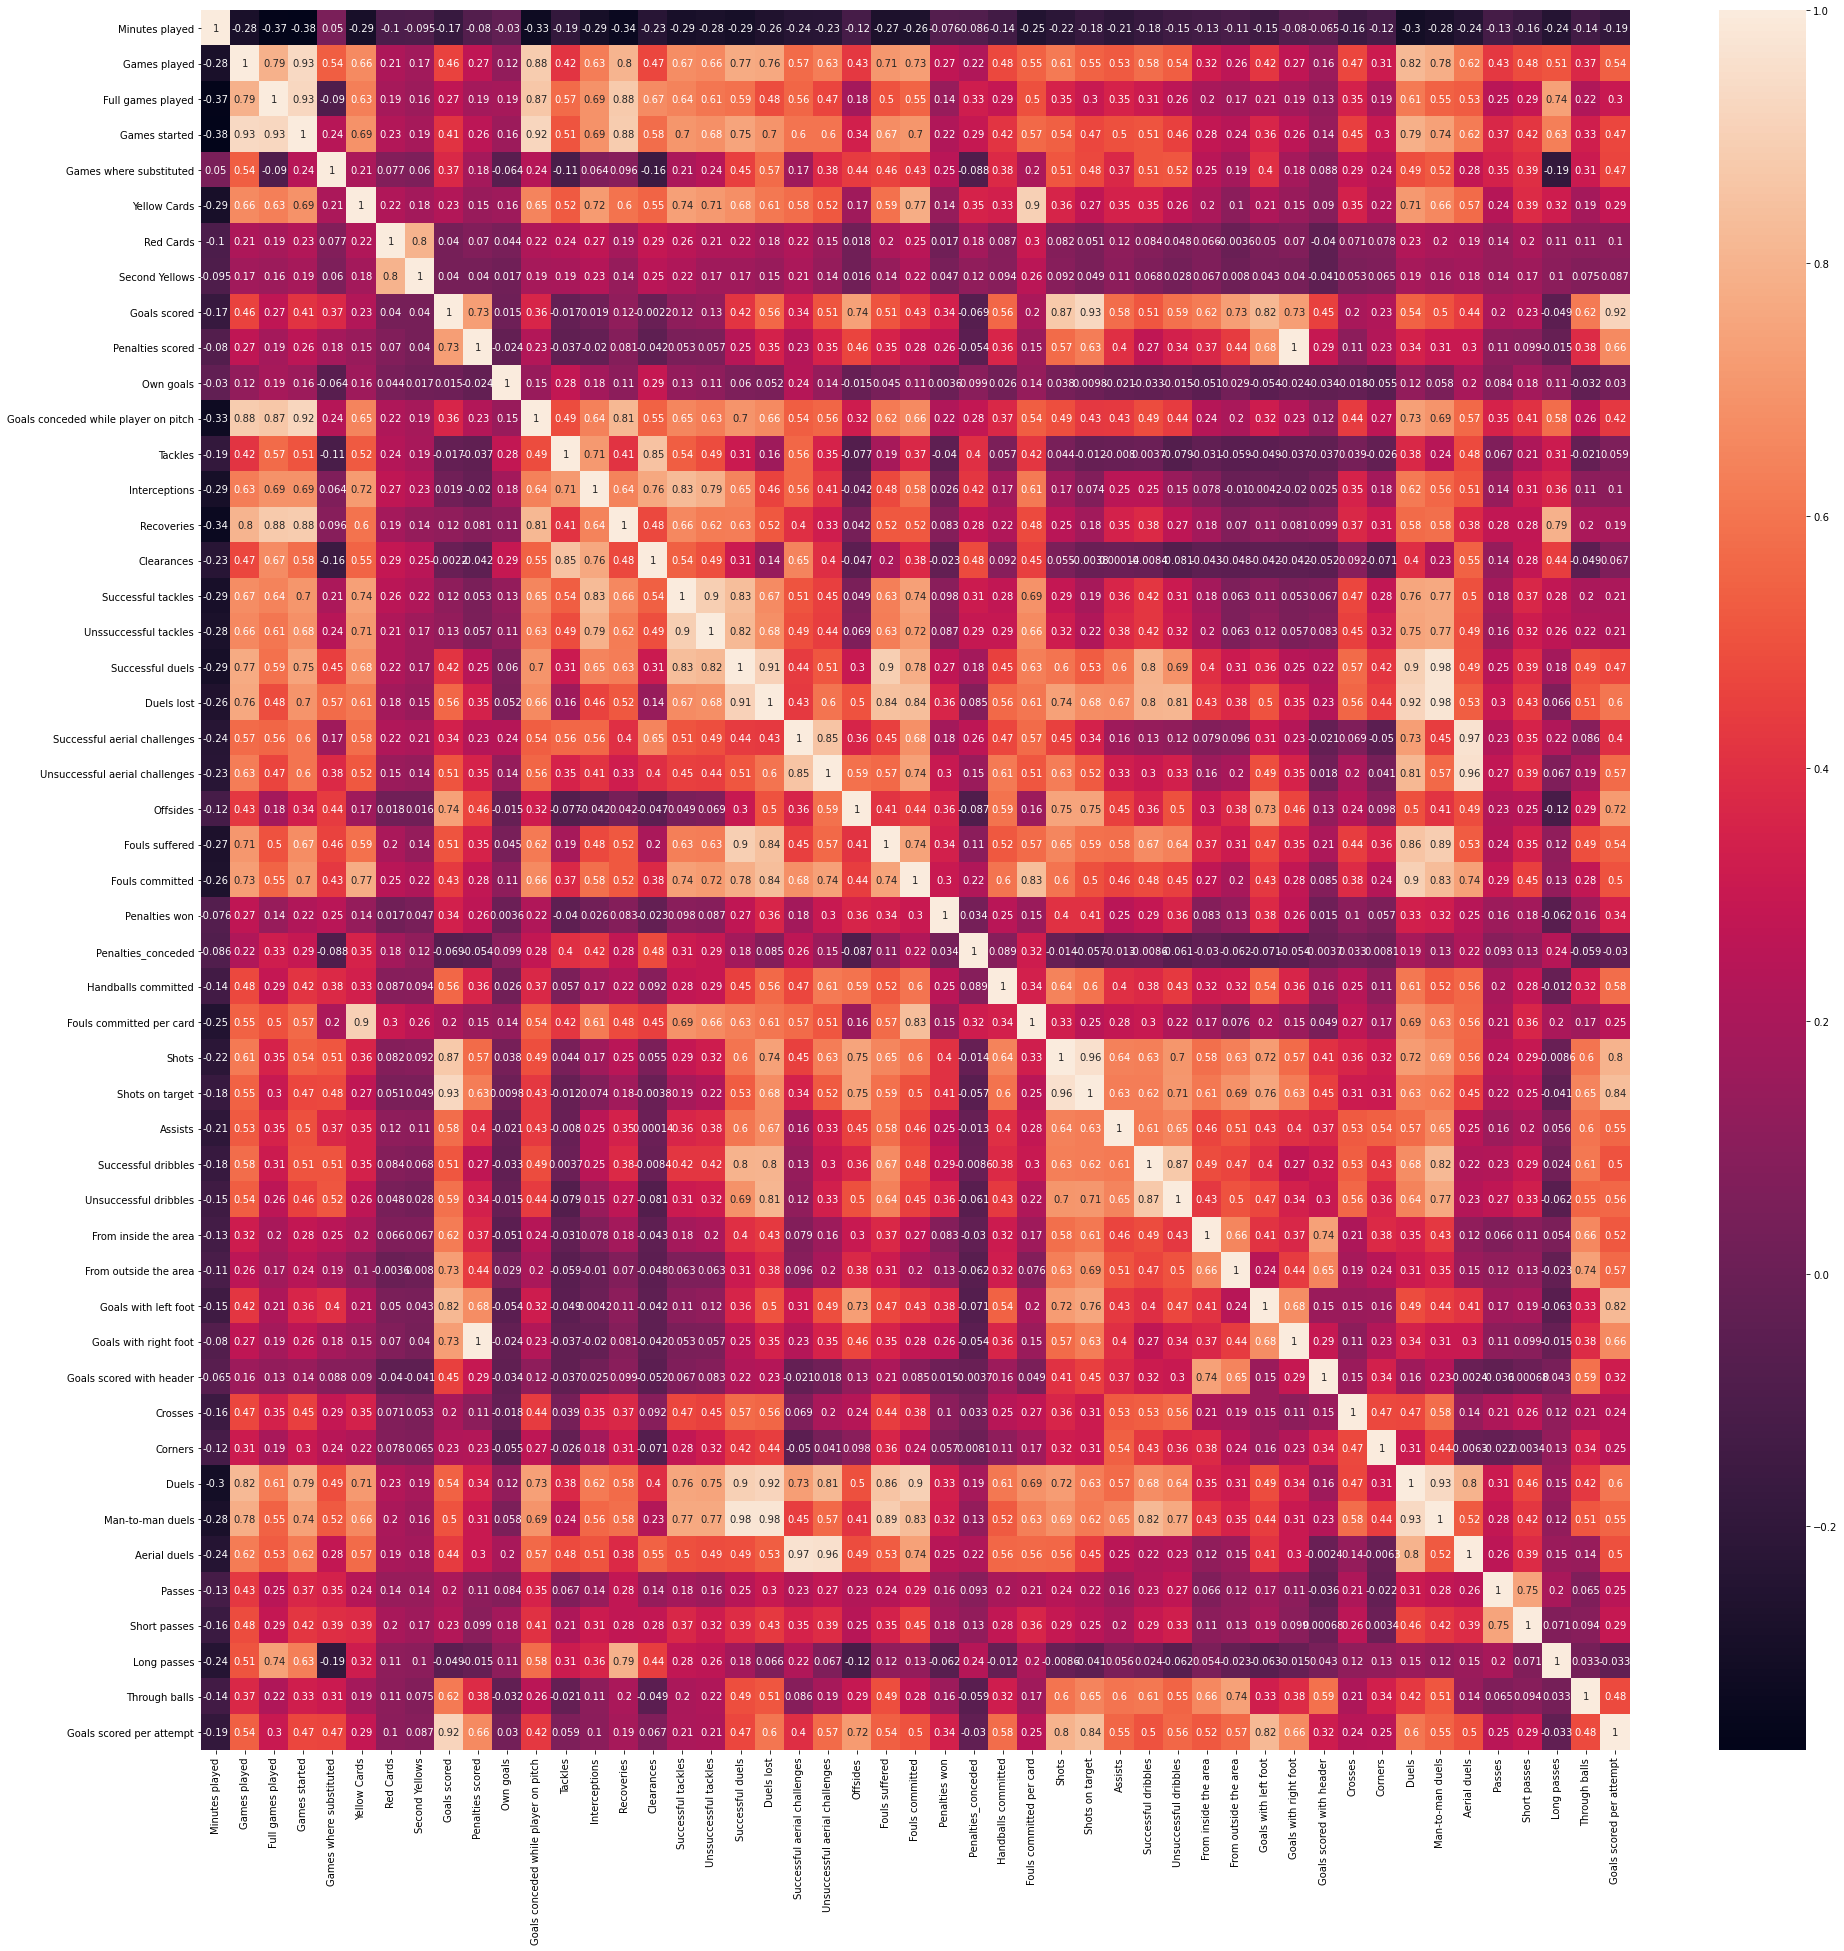

In [115]:
fix,ax=plt.subplots(figsize=(32,32))
corr_matrix = db.corr() 
sns.heatmap(corr_matrix, annot = True); 

### We save all the changes we made

In [109]:
db.to_csv('laliga_player_stats.csv')